In [1]:
#Q2 & Q3  - Model Test Code

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

sizebatch = 1            
size_im = (64, 64)         

vali_directory = 'Testing'   
train_directory = 'Training'


validation_dataset = tf.keras.utils.image_dataset_from_directory(    
  vali_directory,
  seed=123,
  image_size=size_im,
  batch_size=sizebatch
  )


train_dataset = tf.keras.utils.image_dataset_from_directory(    
    train_directory,
    batch_size=sizebatch,
    image_size=size_im,
    seed=42             
)

class_names = train_dataset.class_names 

model = models.Sequential() 
model.add(layers.Conv2D(128, (5,5), activation='relu', input_shape=(64,64,3)))
model.add(layers.AveragePooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)))  
model.add(layers.AveragePooling2D(2,2)) 
model.add(layers.Conv2D(32, (3,3), activation='relu'))   
model.add(layers.AveragePooling2D((2,2))) 
model.add(layers.Flatten())
model.add(layers.Dense(113, activation='relu')) 
model.add(layers.Dense(65, activation='relu')) 
model.add(layers.Dense(40)) 

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) 
print(model.summary())
Fitting = model.fit(train_dataset, epochs=8, validation_data=validation_dataset) 

test_loss, test_accuracy = model.evaluate(validation_dataset, verbose=2) 
print('Accuracy of test = ', test_accuracy)


Found 220 files belonging to 3 classes.
Found 594 files belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 128)       9728      
                                                                 
 average_pooling2d (AverageP  (None, 30, 30, 128)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                          

In [2]:
#Q4 & Q5 - Fine tuning model


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


sizebatch = 1            
size_im = (64, 64)         

vali_directory = 'Testing'   
train_directory = 'Training'

#Validation Dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(    
  vali_directory,
  seed=123,
  image_size=size_im,
  batch_size=sizebatch
  )

#Training Dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(    
    train_directory,
    batch_size=sizebatch,
    image_size=size_im,
    seed=42             
)

class_names = train_dataset.class_names

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(256, (5, 5), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(48, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(113, activation='relu'))
model.add(layers.Dense(65, activation='relu'))
model.add(layers.Dense(40))


model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())

checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(train_dataset,epochs=16, validation_data=validation_dataset, callbacks=[checkpoint])

best_model = tf.keras.models.load_model("best_model.h5")   
 
test_loss, test_accuracy = best_model.evaluate(validation_dataset, verbose=2) 
print('Accuracy of Test = ', test_accuracy)


Found 220 files belonging to 3 classes.
Found 594 files belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 60, 256)       19456     
                                                                 
 average_pooling2d_3 (Averag  (None, 30, 30, 256)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       819328    
                                                                 
 average_pooling2d_4 (Averag  (None, 13, 13, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        73792     
                                        

In [3]:
#Q6 - Evaluate the model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

best_model = tf.keras.models.load_model("best_model.h5") 

validation_loss, validation_accuracy = best_model.evaluate(validation_dataset, verbose=2)
print('Accuracy of Validation:', validation_accuracy)

true_labels = []
predicted_labels = []            
for images, labels in validation_dataset:
    true_labels.extend(labels.numpy())
    predicted_labels.extend(tf.argmax(best_model.predict(images), axis=-1).numpy())

Evalu_report = classification_report(true_labels, predicted_labels)

print("Evalaution Report:")
print(Evalu_report)

220/220 - 2s - loss: 1.5171 - accuracy: 0.9000 - 2s/epoch - 7ms/step
Accuracy of Validation: 0.8999999761581421
1/1 [==============================] - 0s 32ms/step
Evalaution Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        94
           1       0.75      1.00      0.86        65
           2       1.00      1.00      1.00        61

    accuracy                           0.90       220
   macro avg       0.92      0.92      0.91       220
weighted avg       0.93      0.90      0.90       220



1/1 [==============================] - 0s 117ms/step


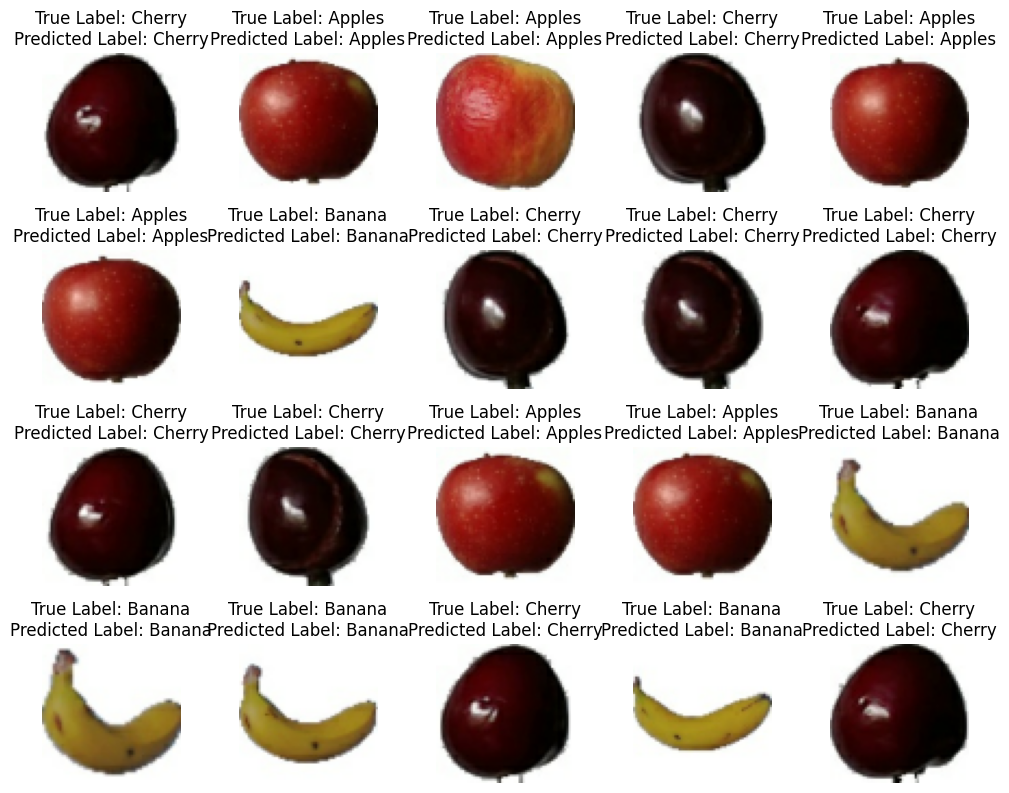

In [4]:
#Q7

import matplotlib.pyplot as plt

sample_no = 20  
test_images = []
test_labels = []

for images, labels in validation_dataset.take(sample_no):
    test_images.append(images[0])
    test_labels.append(labels[0].numpy())


predicted_labels = best_model.predict(np.array(test_images))  
predicted_labels = tf.argmax(predicted_labels, axis=-1).numpy()

class_names = train_dataset.class_names  

plt.figure(figsize=(10,10 ))     
for i in range(sample_no):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].numpy().astype("uint8"))
    true_label = class_names[test_labels[i]]     
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


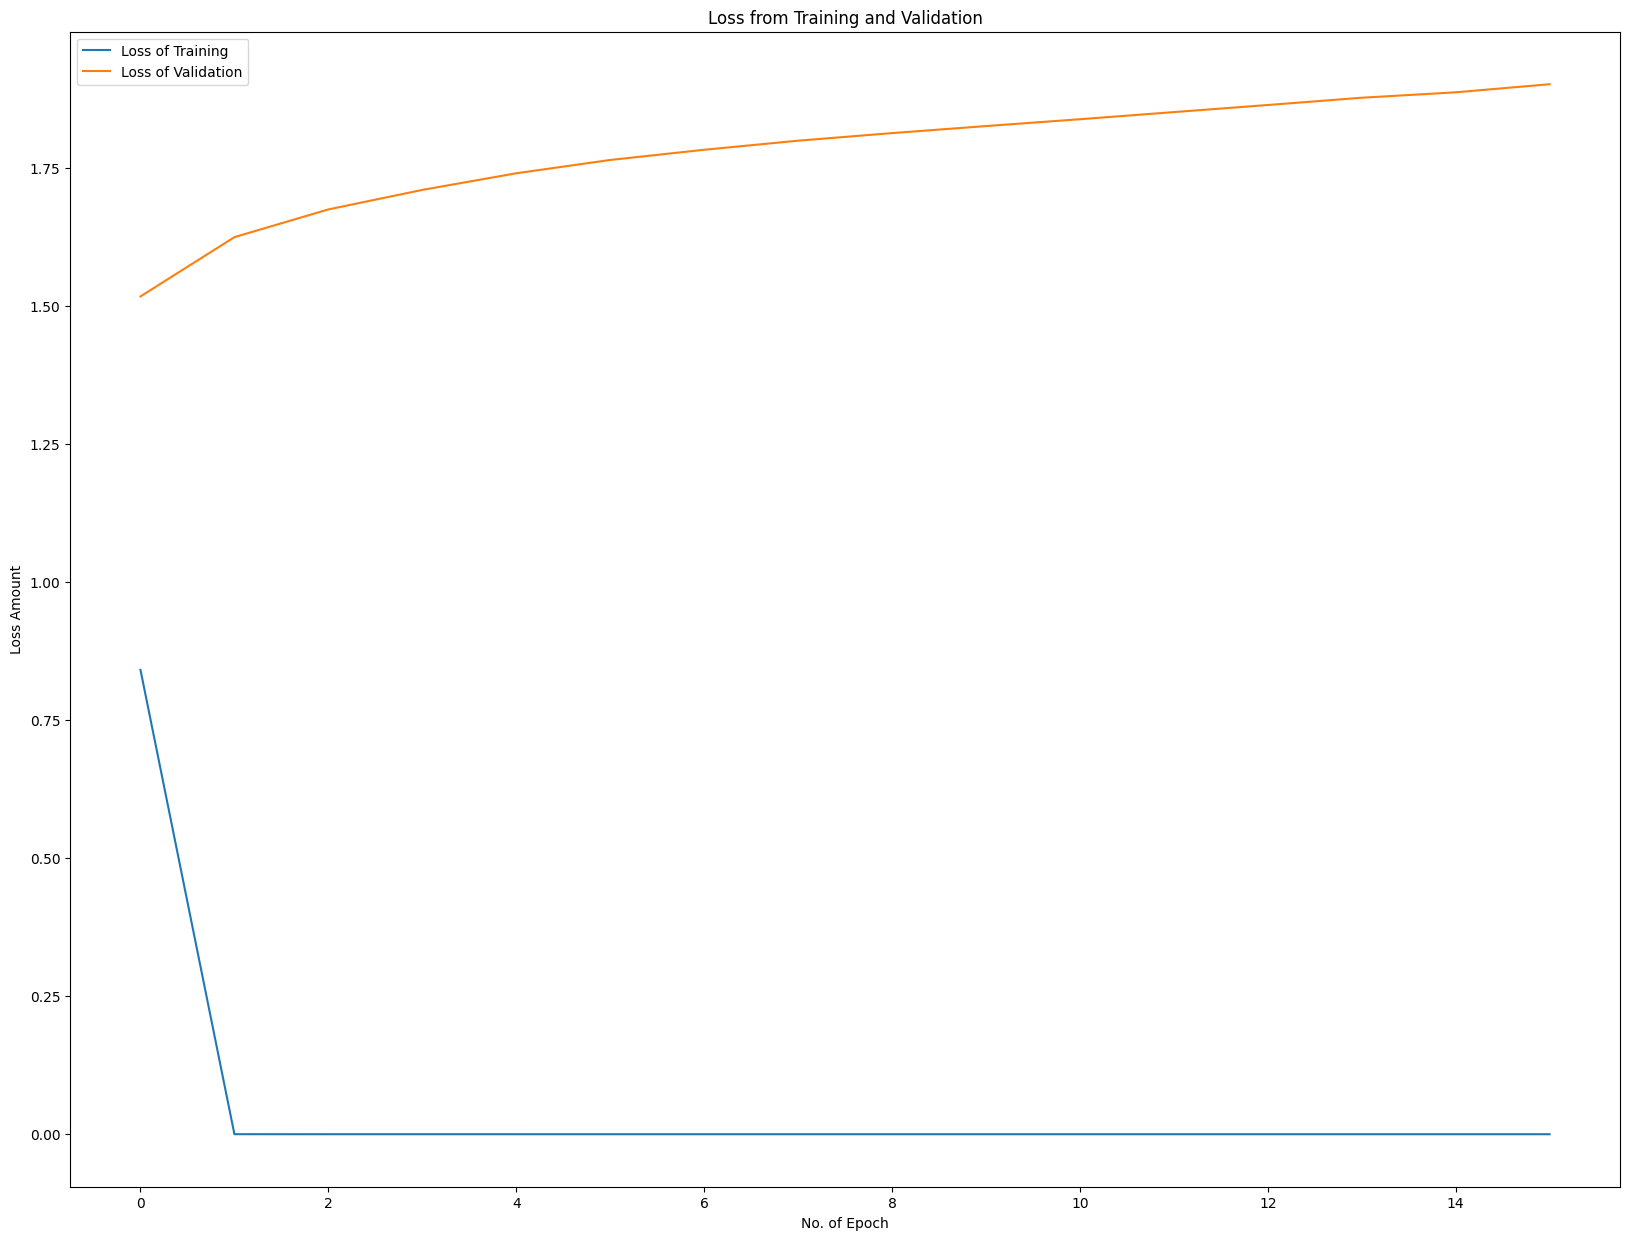

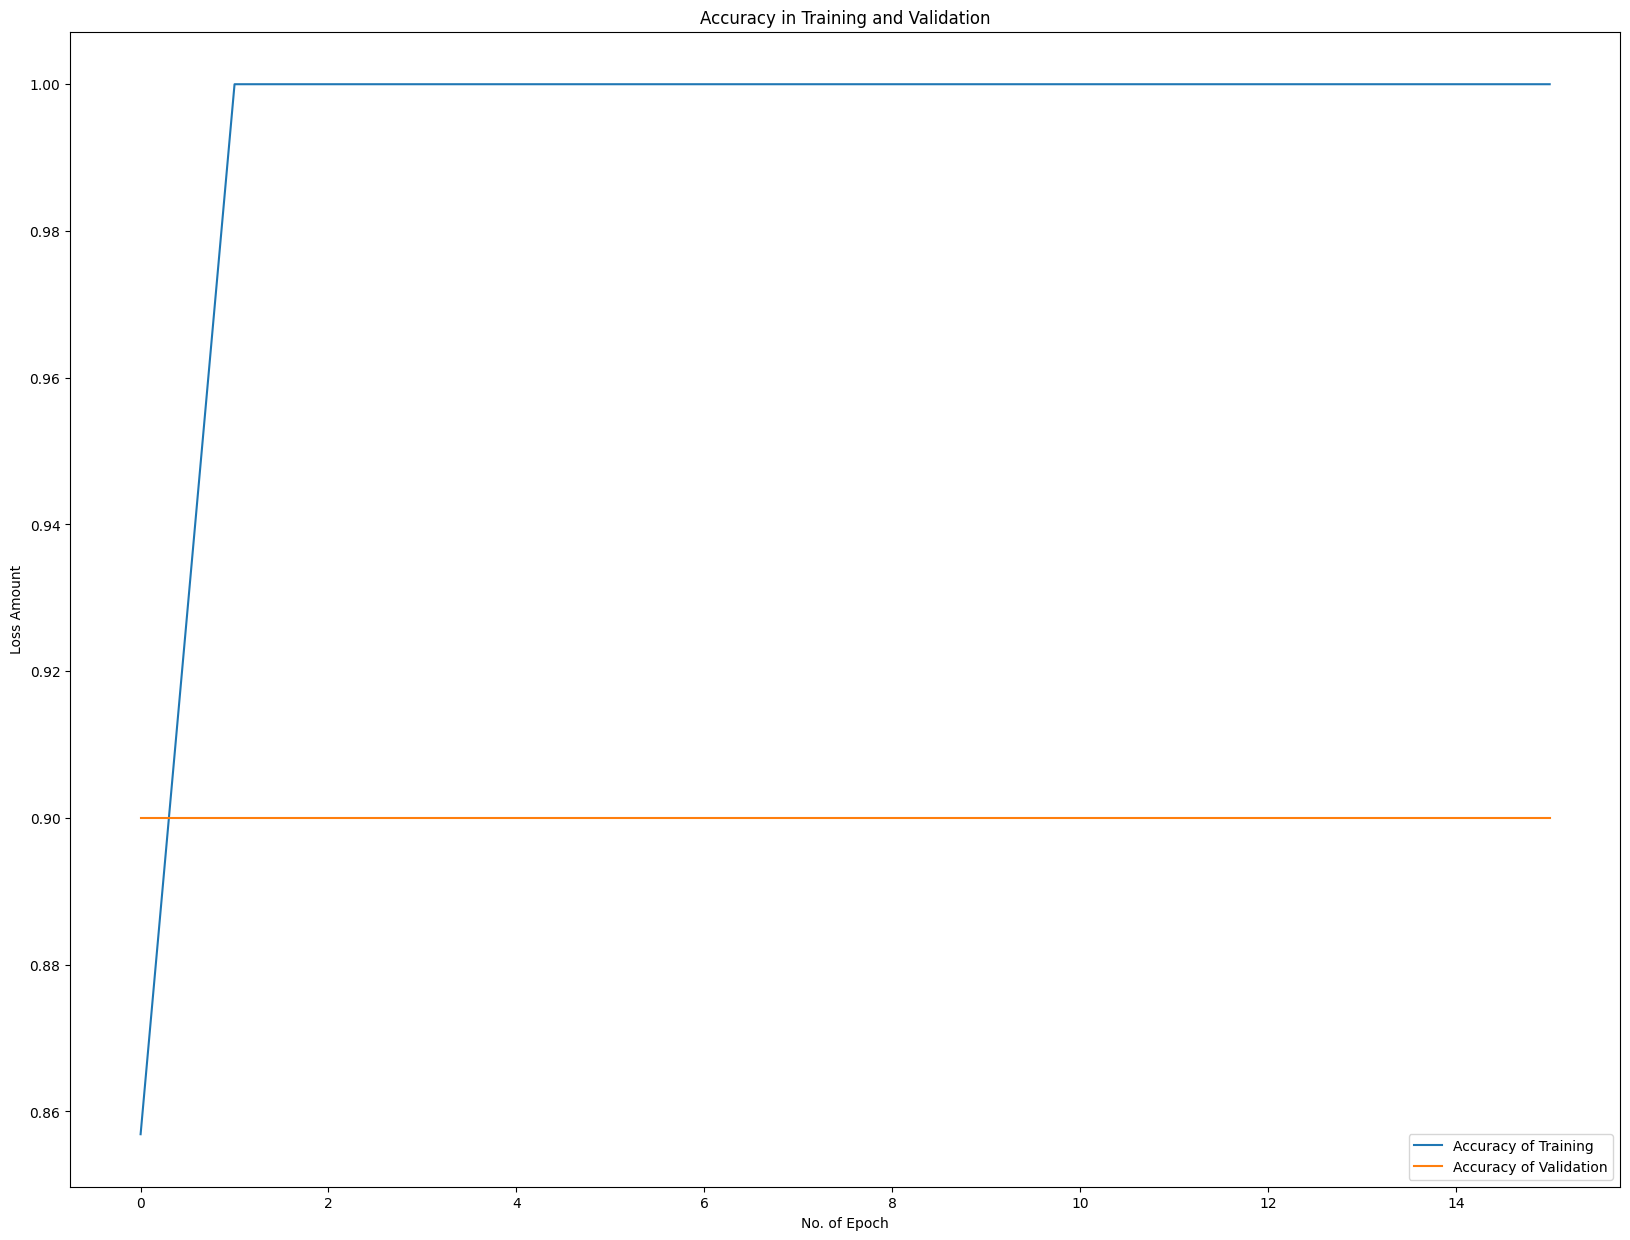

In [5]:
#Q7

import matplotlib.pyplot as plt

loss_training = history.history['loss']        
acc_train = history.history['accuracy']
loss_val = history.history['val_loss']
acc_val = history.history['val_accuracy']


plt.figure(figsize=(20, 15))   
plt.plot(loss_training, label='Loss of Training')
plt.plot(loss_val, label='Loss of Validation')
plt.title('Loss from Training and Validation')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss Amount')
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))   
plt.plot(acc_train, label='Accuracy of Training')
plt.plot(acc_val, label='Accuracy of Validation')
plt.title('Accuracy in Training and Validation')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss Amount')
plt.legend()
plt.show()

